# Sheet 3

This sheet is designed to help you get more comfortable with linear transformations through visualization. Furthermore, we will consider the Cholesky decomposition for symmetric positive definite linear systems.
Let's get intialization out of the way, and then proceed.

In [1]:
import numpy as np
import scipy.linalg

import matplotlib.pyplot as plt         # plotting
import matplotlib.collections as clt    # plotting

%matplotlib inline

from IPython.core.display import HTML
HTML("""<style>.output_png { display: table-cell; text-align: center; vertical-align: middle; }</style>""");

- - -

<div class="alert alert-info">

### Visualizing Transforms
</div>

A simple way to visualize linear transforms over two-dimensional or three-dimensional spaces is to consider their effect on a known geometry, e.g. a square, cube, circle, or sphere. Furthermore, depicting the images of basis vectors can also be helpful.

<div class="alert alert-success">

**Task:** Modify the function `visualize_transform_2d` below such that it draws the transformed rectangle and basis vectors corresponding to the matrix argument `M`.
</div>

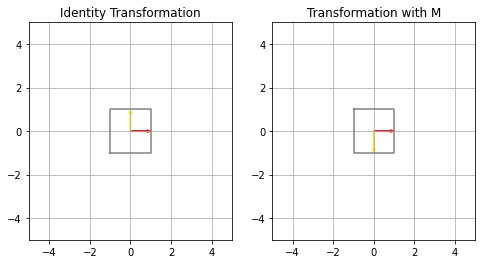

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_transform_2d(ax, M):
    """Visualize the effect of the linear transform described by M on the plot axes ax."""
    
    # Original square (lines array)
    lines = np.array([[-1, 1, 1, -1, -1], [-1, -1, 1, 1, -1]])
    
    # Original basis vectors
    basis = np.array([[1, 0], [0, 1]])
    
    # Transform the square (lines array) using matrix M
    transformed_lines = M @ lines
    
    # Transform the basis vectors using matrix M
    transformed_basis = M @ basis
    
    # Plot the transformed square
    ax.plot(transformed_lines[0, :], transformed_lines[1, :], '-', color="gray")
    
    # Plot the transformed basis vectors
    ax.arrow(0, 0, transformed_basis[0][0], transformed_basis[1][0], color='red', 
             width=.04, length_includes_head=True)
    ax.arrow(0, 0, transformed_basis[0][1], transformed_basis[1][1], color='gold', 
             width=.04, length_includes_head=True)
    
    # Set plot limits and grid
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.grid()

# Example usage
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 4))

# Visualize untransformed geometry
I = np.identity(2)   
visualize_transform_2d(ax0, I)
ax0.set_title("Identity Transformation")

# Visualize transformed geometry with M
M = np.array([[1, 0], [0, -1]])
visualize_transform_2d(ax1, M)
ax1.set_title("Transformation with M")

plt.show()


<div class="alert alert-success">
    
**Task**: Visualize the following types of transforms using the above method:
1. A reflection on the $x$-axis (mirroring with respect to $y$ axis).
2. A *shear transform*, which is given by matrices of the form $S_a := \begin{pmatrix} 1 & a \\ 0 & 1 \end{pmatrix}$ for $a = 2$.
3. A clockwise rotation around the origin with angle $\alpha = 45^\circ$.
</div>

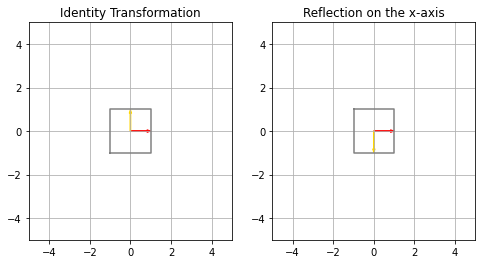

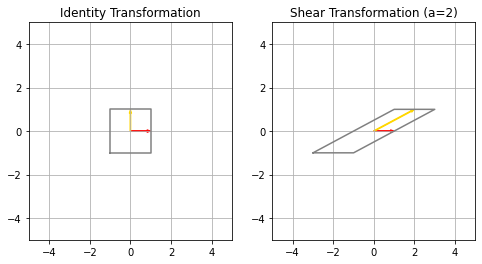

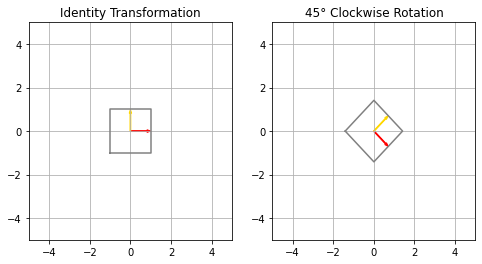

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the visualize_transform_2d function
def visualize_transform_2d(ax, M):
    """Visualize the effect of the linear transform described by M on the plot axes ax."""
    
    # Original square (lines array)
    lines = np.array([[-1, 1, 1, -1, -1], [-1, -1, 1, 1, -1]])
    
    # Original basis vectors
    basis = np.array([[1, 0], [0, 1]])
    
    # Transform the square (lines array) using matrix M
    transformed_lines = M @ lines
    
    # Transform the basis vectors using matrix M
    transformed_basis = M @ basis
    
    # Plot the transformed square
    ax.plot(transformed_lines[0, :], transformed_lines[1, :], '-', color="gray")
    
    # Plot the transformed basis vectors
    ax.arrow(0, 0, transformed_basis[0][0], transformed_basis[1][0], color='red', 
             width=.04, length_includes_head=True)
    ax.arrow(0, 0, transformed_basis[0][1], transformed_basis[1][1], color='gold', 
             width=.04, length_includes_head=True)
    
    # Set plot limits and grid
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.grid()

# Reflection on the x-axis
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 4))

I = np.identity(2)   
visualize_transform_2d(ax0, I)
ax0.set_title("Identity Transformation")

# Reflection matrix
M_reflection = np.array([[1, 0], [0, -1]])
visualize_transform_2d(ax1, M_reflection)
ax1.set_title("Reflection on the x-axis")

plt.show()

# Shear transformation with a = 2
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 4))

I = np.identity(2)   
visualize_transform_2d(ax0, I)
ax0.set_title("Identity Transformation")

# Shear matrix
M_shear = np.array([[1, 2], [0, 1]])
visualize_transform_2d(ax1, M_shear)
ax1.set_title("Shear Transformation (a=2)")

plt.show()

# Clockwise rotation by 45 degrees
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 4))

I = np.identity(2)   
visualize_transform_2d(ax0, I)
ax0.set_title("Identity Transformation")

# Rotation matrix for 45 degree clockwise
alpha = np.pi / 4  # 45 degrees in radians
M_rotation = np.array([[np.cos(-alpha), -np.sin(-alpha)], 
                       [np.sin(-alpha),  np.cos(-alpha)]])
visualize_transform_2d(ax1, M_rotation)
ax1.set_title("45° Clockwise Rotation")

plt.show()


<div class="alert alert-success">

**Task**: Use `visualize_transform_2d` to illustrate that matrix multiplication is -- in general -- not commutative, i.e. 

$$A\cdot B \neq B\cdot A.$$ 
for two $2\times 2$-matrices $A$, $B$. To show this, find two matrices $A$ and $B$ that do not commute, and visualize the respective transforms. You can choose $A$ and $B$ from the transforms in the previous task.
<div>

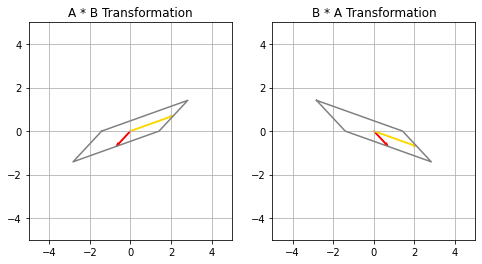

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the matrices
A = np.array([[1, 2], [0, 1]])  # Shear matrix
alpha = np.pi / 4  # 45 degrees in radians
B = np.array([[np.cos(-alpha), -np.sin(-alpha)], 
              [np.sin(-alpha),  np.cos(-alpha)]])  # Rotation matrix

# Compute A * B and B * A
AB = A @ B
BA = B @ A

# Visualize A * B
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 4))
visualize_transform_2d(ax0, AB)
ax0.set_title("A * B Transformation")

# Visualize B * A
visualize_transform_2d(ax1, BA)
ax1.set_title("B * A Transformation")

plt.show()


<div class="alert alert-info">

### Cholesky Decomposition
</div>

As discussed in the course, a linear system with a symmetric positive definite system matrix $A\in\mathbb{R}^{n\times n}$ can be solved using the Cholesky decomposition, which we will try out in the following.

First, let's define a function to give us a random $n\times n$ system matrix $A$ and RHS $b$.

In [8]:
def random_spd_linear_system( n ):

    # generate a random RHS
    b = 2.0 * np.random.rand(n, 1) - 1.0

    # generate a random matrix and RHS
    M = 2.0 * np.random.rand(n, n) - 1.0
    A = np.matmul(M,np.transpose(M))
    return A, b
    
A, b = random_spd_linear_system( 50 )

ITo solve the linear system $A x = b$, we can first perform *Cholesky decomposition* $A= L L^T$, where $L$ is lower triangular, giving two triangular systems

$$ L y = b \qquad\text{and}\qquad L^T x = y$$, 

whose solution $x$ is the solution of $Ax = b$.

<div class="alert alert-success">
    
**Task:** Complete the function `solve_linear_sytem_cholesky` below to return the solution of $Ax = b$.

Steps:
1. Compute Cholesky decomposition of $A = L L^T$
2. Solve $Ly = b$ using forward substitution.
3. Solve $L^Tx = y$ using backward substitution.
4. Return $x$ as the solution.

Hint: You may use `fwd_subs` and `bwd_subs` from the second Homework. You can check the correctness of your implementation by evaluating the residual vector $r = b-Ax$. 
</div>

In [9]:
import numpy as np
import scipy.linalg

def solve_linear_system_cholesky(A, b):
    """Solve Ax = b using Cholesky method."""
    
    # Step 1: Compute Cholesky decomposition A = L * L^T
    L = np.linalg.cholesky(A)
    
    # Step 2: Solve L * y = b using forward substitution
    y = scipy.linalg.solve_triangular(L, b, lower=True)
    
    # Step 3: Solve L^T * x = y using backward substitution
    x = scipy.linalg.solve_triangular(L.T, y, lower=False)
    
    return x

# Function to generate a random symmetric positive definite (SPD) matrix
def random_spd_linear_system(n):
    """Generate a random symmetric positive definite matrix A and random RHS b."""
    b = 2.0 * np.random.rand(n, 1) - 1.0  # Random RHS
    M = 2.0 * np.random.rand(n, n) - 1.0  # Random matrix
    A = np.matmul(M, np.transpose(M))  # A = M * M^T, which is SPD
    return A, b

# Generate a random SPD system
A, b = random_spd_linear_system(50)

# Solve the system using Cholesky decomposition
x = solve_linear_system_cholesky(A, b)

# Calculate the residual
residual = b - np.matmul(A, x)
print("Residual:\n", residual)


Residual:
 [[ 1.26565425e-14]
 [-2.04281037e-14]
 [ 6.75015599e-14]
 [-1.53210777e-14]
 [ 2.30926389e-14]
 [ 2.90878432e-14]
 [ 3.77475828e-15]
 [ 2.15383267e-14]
 [-1.77635684e-15]
 [ 4.84057239e-14]
 [ 2.23154828e-13]
 [ 8.28226376e-14]
 [-6.43929354e-15]
 [ 3.99680289e-14]
 [-8.32667268e-14]
 [-2.37587727e-14]
 [ 1.57651669e-14]
 [ 1.86517468e-14]
 [-1.53210777e-14]
 [ 6.21724894e-15]
 [-6.88338275e-14]
 [-1.23234756e-13]
 [ 8.52651283e-14]
 [-2.81996648e-14]
 [-6.59472477e-14]
 [ 5.26245714e-14]
 [-5.37347944e-14]
 [ 2.53130850e-14]
 [ 1.00808251e-13]
 [-4.57411886e-14]
 [-9.45910017e-14]
 [-4.44089210e-15]
 [-6.43929354e-15]
 [-6.92779167e-14]
 [-3.10862447e-14]
 [-1.48769885e-13]
 [-6.52811138e-14]
 [ 7.12763182e-14]
 [ 4.50750548e-14]
 [-4.21884749e-14]
 [-5.10702591e-14]
 [ 6.26165786e-14]
 [ 6.01740879e-14]
 [ 2.06501483e-14]
 [ 7.74935671e-14]
 [-8.39328607e-14]
 [-7.32747196e-14]
 [ 3.48610030e-14]
 [-7.32747196e-14]
 [ 2.90878432e-14]]
